> import required libraries



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import  Dense
from keras.layers import LSTM

>loading  data set from file

In [ ]:
data_set = pd.read_csv("/content/drive/MyDrive/bitcoin_ticker.csv")
data_set.head()

,date_id,datetime_id,market,rpt_key,last,diff_24h,diff_per_24h,bid,ask,low,high,volume,created_at,updated_at
0,2017-05-31,2017-06-01 00:00:00,bitstamp,btc_eur,1996.72,2029.99,-1.638924,2005.50,2005.56,1950.00,2063.73,2314.500750,2017-05-31 14:59:36,2017-05-31 14:59:36
1,2017-05-31,2017-06-01 00:00:00,bitflyer,btc_jpy,267098.00,269649.00,-0.946045,267124.00,267267.00,267124.00,267267.00,70922.880112,2017-05-31 14:59:36,2017-05-31 14:59:36
2,2017-05-31,2017-06-01 00:00:00,korbit,btc_krw,3003500.00,3140000.00,-4.347134,3003500.00,3004000.00,3002000.00,3209500.00,6109.752872,2017-05-31 14:59:36,2017-05-31 14:59:36
3,2017-05-31,2017-06-01 00:00:00,bitstamp,btc_usd,2237.40,2239.37,-0.087971,2233.09,2237.40,2154.28,2293.46,13681.282017,2017-05-31 14:59:36,2017-05-31 14:59:36
4,2017-05-31,2017-06-01 00:00:00,okcoin,btc_usd,2318.82,2228.70,4.043613,2319.40,2319.99,2129.78,2318.82,4241.641516,2017-05-31 14:59:36,2017-05-31 14:59:36


> some development actions, to get some understanding on data set

In [ ]:
data_set['rpt_key'].value_counts()

btc_usd       125438
btc_eur        62719
btc_jpy        62719
btc_krw        62719
etc_krw        62719
eth_btc        62719
eth_krw        62719
fx_btc_jpy     62719
ltc_usd        62719
Name: rpt_key, dtype: int64

# New Section

> building btc data frame

In [ ]:
data_frame = data_set.loc[(data_set['rpt_key'] == 'btc_usd')]
data_frame.head()

,date_id,datetime_id,market,rpt_key,last,diff_24h,diff_per_24h,bid,ask,low,high,volume,created_at,updated_at
3,2017-05-31,2017-06-01 00:00:00,bitstamp,btc_usd,2237.40,2239.37,-0.087971,2233.09,2237.40,2154.28,2293.46,13681.282017,2017-05-31 14:59:36,2017-05-31 14:59:36
4,2017-05-31,2017-06-01 00:00:00,okcoin,btc_usd,2318.82,2228.70,4.043613,2319.40,2319.99,2129.78,2318.82,4241.641516,2017-05-31 14:59:36,2017-05-31 14:59:36
15,2017-06-01,2017-06-01 00:01:00,bitstamp,btc_usd,2248.39,2242.44,0.265336,2247.77,2248.38,2154.28,2293.46,13701.698603,2017-05-31 15:00:36,2017-05-31 15:00:36
16,2017-06-01,2017-06-01 00:01:00,okcoin,btc_usd,2320.42,2228.40,4.129420,2320.99,2321.49,2129.78,2322.00,4260.261516,2017-05-31 15:00:36,2017-05-31 15:00:36
23,2017-06-01,2017-06-01 00:02:00,bitstamp,btc_usd,2248.35,2238.58,0.436437,2248.35,2248.69,2154.28,2293.46,13742.110913,2017-05-31 15:01:36,2017-05-31 15:01:36


>Convert datetime_id to data type and filter dates greater than  2017-06-28 00:00:00"

In [ ]:
data_frame = data_frame.reset_index(drop=True)
data_frame['datetime'] = pd.to_datetime(data_frame['datetime_id'])
data_frame = data_frame.loc[data_frame['datetime'] > pd.to_datetime('2017-06-28 00:00:00')]


In [ ]:
data_frame.head(3)

,date_id,datetime_id,market,rpt_key,last,diff_24h,diff_per_24h,bid,ask,low,high,volume,created_at,updated_at,datetime
77762,2017-06-28,2017-06-28 00:01:00,bitstamp,btc_usd,2344.00,2491.98,-5.938250,2335.01,2343.89,2307.0,2473.19,20719.583592,2017-06-27 15:00:41,2017-06-27 15:00:41,2017-06-28 00:01:00
77763,2017-06-28,2017-06-28 00:01:00,okcoin,btc_usd,2499.39,2682.25,-6.817411,2495.00,2499.33,2444.0,2780.62,2265.557866,2017-06-27 15:00:41,2017-06-27 15:00:41,2017-06-28 00:01:00
77764,2017-06-28,2017-06-28 00:02:00,bitstamp,btc_usd,2337.18,2491.98,-6.211928,2337.18,2340.00,2307.0,2473.19,20732.082581,2017-06-27 15:01:41,2017-06-27 15:01:41,2017-06-28 00:02:00


In [ ]:
data_frame.drop(['date_id', 'datetime_id', 'market', 'rpt_key', 'created_at', 'updated_at'], inplace=True, axis=1)
data_frame.head()

,last,diff_24h,diff_per_24h,bid,ask,low,high,volume,datetime
77762,2344.00,2491.98,-5.938250,2335.01,2343.89,2307.0,2473.19,20719.583592,2017-06-28 00:01:00
77763,2499.39,2682.25,-6.817411,2495.00,2499.33,2444.0,2780.62,2265.557866,2017-06-28 00:01:00
77764,2337.18,2491.98,-6.211928,2337.18,2340.00,2307.0,2473.19,20732.082581,2017-06-28 00:02:00
77765,2492.76,2682.25,-7.064591,2492.76,2495.00,2444.0,2780.62,2262.618866,2017-06-28 00:02:00
77766,2335.02,2491.98,-6.298606,2335.01,2335.02,2307.0,2473.19,20665.357191,2017-06-28 00:03:00


> we require only the last value, so we subset that and convert it to numpy array

In [ ]:
df = data_frame[['last']]
df.head()

,last
77762,2344.00
77763,2499.39
77764,2337.18
77765,2492.76
77766,2335.02


In [ ]:
dataset = df.values
dataset = dataset.astype('float32')
dataset

array([[2344.  ],
       [2499.39],
       [2337.18],
       ...,
       [2394.03],
       [2320.47],
       [2394.03]], dtype=float32)

>Neural networks are sensitive to input data, especiallly when we are using activation functions like sigmoid or tanh activation functions are used. So we rescale our data to the range of 0-to-1, using MinMaxScaler

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [ ]:
dataset

array([[0.1997695 ],
       [0.49828053],
       [0.18666792],
       ...,
       [0.29587936],
       [0.15456724],
       [0.29587936]], dtype=float32)

In [ ]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]
print(len(train), len(test))

31942 15734


>Now let us define the function called create_dataset, which take two inputs,
1. Dataset - numpy array that we want to convert into a dataset,
2. look_back - number of previous time steps to use as input variables to predict the next time period

In [ ]:
# convert an array of values into a dataset
def create_dataset(dataset, look_back=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back), 0]
    dataX.append(a)
    dataY.append(dataset[i + look_back, 0])
  return np.array(dataX), np.array(dataY)

In [ ]:
look_back = 10
trainX, trainY = create_dataset(train, look_back=look_back)
testX, testY = create_dataset(test, look_back=look_back)

In [ ]:
trainX

array([[0.1997695 , 0.49828053, 0.18666792, ..., 0.4975314 , 0.19973087,
        0.4860053 ],
       [0.49828053, 0.18666792, 0.4855442 , ..., 0.19973087, 0.4860053 ,
        0.18442059],
       [0.18666792, 0.4855442 , 0.18251848, ..., 0.4860053 , 0.18442059,
        0.48598576],
       ...,
       [0.53376245, 0.6943617 , 0.53105354, ..., 0.7082124 , 0.5205841 ,
        0.7081547 ],
       [0.6943617 , 0.53105354, 0.70823145, ..., 0.5205841 , 0.7081547 ,
        0.52665424],
       [0.53105354, 0.70823145, 0.5332055 , ..., 0.7081547 , 0.52665424,
        0.7081547 ]], dtype=float32)

In [ ]:
trainY

array([0.18442059, 0.48598576, 0.19208527, ..., 0.52665424, 0.7081547 ,
       0.5206418 ], dtype=float32)

In [ ]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

>Build our Model

In [ ]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=256, verbose=2)

Epoch 1/100
125/125 - 3s - loss: 0.4481 - 3s/epoch - 22ms/step
Epoch 2/100
125/125 - 0s - loss: 0.0359 - 255ms/epoch - 2ms/step
Epoch 3/100
125/125 - 0s - loss: 0.0197 - 286ms/epoch - 2ms/step
Epoch 4/100
125/125 - 0s - loss: 0.0159 - 266ms/epoch - 2ms/step
Epoch 5/100
125/125 - 0s - loss: 0.0127 - 264ms/epoch - 2ms/step
Epoch 6/100
125/125 - 0s - loss: 0.0100 - 257ms/epoch - 2ms/step
Epoch 7/100
125/125 - 0s - loss: 0.0077 - 274ms/epoch - 2ms/step
Epoch 8/100
125/125 - 0s - loss: 0.0059 - 276ms/epoch - 2ms/step
Epoch 9/100
125/125 - 0s - loss: 0.0044 - 256ms/epoch - 2ms/step
Epoch 10/100
125/125 - 0s - loss: 0.0033 - 273ms/epoch - 2ms/step
Epoch 11/100
125/125 - 0s - loss: 0.0024 - 277ms/epoch - 2ms/step
Epoch 12/100
125/125 - 0s - loss: 0.0019 - 283ms/epoch - 2ms/step
Epoch 13/100
125/125 - 0s - loss: 0.0014 - 247ms/epoch - 2ms/step
Epoch 14/100
125/125 - 0s - loss: 0.0011 - 307ms/epoch - 2ms/step
Epoch 15/100
125/125 - 0s - loss: 9.2368e-04 - 304ms/epoch - 2ms/step
Epoch 16/100
125/

In [ ]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

>We have to invert the predictions before calculating error to so that reports will be in same units as our original data

In [ ]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [ ]:
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:, 0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:, 0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 4.85 RMSE
Test Score: 6.83 RMSE


In [ ]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict) + look_back, :] = trainPredict


In [ ]:
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict) + (look_back * 2) + 1:len(dataset) - 1, :] = testPredict

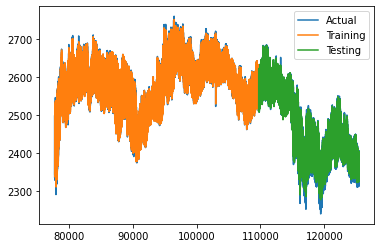

In [ ]:
plt.plot(df['last'], label='Actual')
plt.plot(pd.DataFrame(trainPredictPlot, columns=["close"], index=df.index).close, label='Training')
plt.plot(pd.DataFrame(testPredictPlot, columns=["close"], index=df.index).close, label='Testing')
plt.legend(loc='best')
plt.show()